# What's the weather like as we approach the equator?

Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator.

NOTE: This project takes into account the weather inforomation from one day. Each time the code is run it randomizes 500 cities and pulls the current weather data so the results of this code will vary each time it is run.

In [1]:
# ependencies
import openweathermapy.core as owm
import json
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import requests
from citipy import citipy
from datetime import datetime as dt

# Get API key
from owm_config import api_key

# Set plot style
plt.style.use("seaborn")

# To hide warnings
import warnings
warnings.filterwarnings('ignore')

# Get 500 random cities and random distances from the equator

In [2]:
# Getting lat/lng values for finding cities

# Set Lat & Lng Zones to randomly pick geo coordinates
lat_zone = np.arange(-90,90,15)
lng_zone = np.arange(-180,180,15)


# Creating df for geo coordinates
locations_df = pd.DataFrame()

locations_df["Lat"] = ""
locations_df["Lng"] = ""

# From each zone, randomly pick 50 unique coordinates and adding to the dataframe.
for x in lat_zone:
    for y in lng_zone:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        latitude = random.sample(x_values,50)
        longitude = random.sample(y_values,50)
        lat_samples = [(x+dec_lat) for dec_lat in latitude]
        lng_samples = [y+dec_lng for dec_lng in longitude]
        locations_df = locations_df.append(pd.DataFrame.from_dict({"Lat":lat_samples,
                                       "Lng":lng_samples}))
locations_df = locations_df.reset_index(drop=True)
locations_df.shape

(14400, 2)

In [3]:
# Using citipy to get nearest city to location coordinates

locations_df["Closest City"] = ""
locations_df["Country Code"] = ""
for index,row in locations_df.iterrows():
    city = citipy.nearest_city(row["Lat"],row["Lng"])
    locations_df.set_value(index,"Closest City",city.city_name)
    locations_df.set_value(index,"Country Code",city.country_code)
locations_df.head()


,Lat,Lng,Closest City,Country Code
0,-178.40,-353.11,vaini,to
1,-172.40,-351.03,vaini,to
2,-167.35,-355.29,vaini,to
3,-177.47,-347.29,vaini,to
4,-172.12,-345.29,vaini,to


In [4]:
# Deleting random coordinates that do not match city coordinates

cities_df = locations_df.drop(['Lat', 'Lng'],axis=1)

# Dropping and duplicate cities
cities_df = cities_df.drop_duplicates()

cities_df.shape

(874, 2)

# Don't forget to change sample size to 500 when done

In [5]:
# Getting 500 random cities for the remaining list
random_cities = cities_df.sample(500)
random_cities = random_cities.reset_index(drop=True)
random_cities.head()

,Closest City,Country Code
0,cananeia,br
1,camacha,pt
2,bambous virieux,mu
3,muborak,uz
4,zabol,ir


# Get weather data for the 500 random cities selected above

In [6]:
# Get current weather to see the JSON format
settings = {"units": "metric", "appid": api_key}
current_weather_clt = owm.get_current("Charlotte", **settings)
print(f"{json.dumps(current_weather_clt, indent=4)}")

{
    "coord": {
        "lon": -80.84,
        "lat": 35.23
    },
    "weather": [
        {
            "id": 800,
            "main": "Clear",
            "description": "clear sky",
            "icon": "01n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 10.01,
        "pressure": 1025,
        "humidity": 42,
        "temp_min": 8,
        "temp_max": 11
    },
    "visibility": 16093,
    "wind": {
        "speed": 3.6,
        "deg": 70
    },
    "clouds": {
        "all": 1
    },
    "dt": 1522022100,
    "sys": {
        "type": 1,
        "id": 1797,
        "message": 0.0095,
        "country": "US",
        "sunrise": 1522063108,
        "sunset": 1522107599
    },
    "id": 4460243,
    "name": "Charlotte",
    "cod": 200
}


In [7]:
# Setting up values for OpenWeatherMap API calls
base_url = "http://api.openweathermap.org/data/2.5/weather"

params = { "appid" :api_key,"units":"metric" }

In [8]:
# Loop through to get Lat, Lng, Temp, Wind Speed, Humidity, and Cloudienss for each random city
# and append to random_cities

# I figured out how to hide my key
def encrypt_key(input_url):
    return input_url[0:53]+"<NoSeeMyKey>"+input_url[85:]

for index,row in random_cities.iterrows():
    params["q"] =f'{row["Closest City"]},{row["Country Code"]}'
    print(f"Processing Record {index+1} for: {params['q']}")
    city_weather = requests.get(base_url,params)
    print(encrypt_key(city_weather.url))
    city_weather  = city_weather.json()
    random_cities.set_value(index,"Latitude",city_weather.get("coord",{}).get("lat"))
    random_cities.set_value(index,"Longitude",city_weather.get("coord",{}).get("lon"))
    random_cities.set_value(index,"Temperature",city_weather.get("main",{}).get("temp_max"))
    random_cities.set_value(index,"Wind Speed",city_weather.get("wind",{}).get("speed"))
    random_cities.set_value(index,"Humidity",city_weather.get("main",{}).get("humidity"))
    random_cities.set_value(index,"Cloudiness",city_weather.get("clouds",{}).get("all"))

Processing Record 1 for: cananeia,br
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=cananeia%2Cbr
Processing Record 2 for: camacha,pt
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=camacha%2Cpt
Processing Record 3 for: bambous virieux,mu
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=bambous+virieux%2Cmu
Processing Record 4 for: muborak,uz
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=muborak%2Cuz
Processing Record 5 for: zabol,ir
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=zabol%2Cir
Processing Record 6 for: sovetskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=sovetskiy%2Cru
Processing Record 7 for: vigia del fuerte,co
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=vigia+del+fuerte%2Cco
Processing Record 8 for: lagos,ng
http://api.openweath

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=orgun%2Caf
Processing Record 64 for: hilo,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=hilo%2Cus
Processing Record 65 for: aklavik,ca
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=aklavik%2Cca
Processing Record 66 for: bayburt,tr
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=bayburt%2Ctr
Processing Record 67 for: charsadda,pk
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=charsadda%2Cpk
Processing Record 68 for: haines junction,ca
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=haines+junction%2Cca
Processing Record 69 for: miranda,br
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=miranda%2Cbr
Processing Record 70 for: nurota,uz
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=angoche%2Cmz
Processing Record 127 for: belen,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=belen%2Cus
Processing Record 128 for: santa cruz de la palma,es
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=santa+cruz+de+la+palma%2Ces
Processing Record 129 for: yucaipa,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=yucaipa%2Cus
Processing Record 130 for: shkotovo-22,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=shkotovo-22%2Cru
Processing Record 131 for: thompson,ca
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=thompson%2Cca
Processing Record 132 for: muisne,ec
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=muisne%2Cec
Processing Record 133 for: warqla,dz
http://api.openweathermap.org/data/2.5/weat

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=dukat%2Cru
Processing Record 189 for: rabo de peixe,pt
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=rabo+de+peixe%2Cpt
Processing Record 190 for: san miguel,pa
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=san+miguel%2Cpa
Processing Record 191 for: cherskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=cherskiy%2Cru
Processing Record 192 for: hovd,mn
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=hovd%2Cmn
Processing Record 193 for: margate,za
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=margate%2Cza
Processing Record 194 for: quelimane,mz
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=quelimane%2Cmz
Processing Record 195 for: dalton,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMy

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=ho%2Cgh
Processing Record 251 for: sistranda,no
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=sistranda%2Cno
Processing Record 252 for: altoona,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=altoona%2Cus
Processing Record 253 for: tiksi,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=tiksi%2Cru
Processing Record 254 for: kannangad,in
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=kannangad%2Cin
Processing Record 255 for: san jeronimo,mx
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=san+jeronimo%2Cmx
Processing Record 256 for: sitka,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=sitka%2Cus
Processing Record 257 for: totness,sr
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=jimeta%2Cng
Processing Record 313 for: orbetello,it
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=orbetello%2Cit
Processing Record 314 for: sundumbili,za
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=sundumbili%2Cza
Processing Record 315 for: manokwari,id
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=manokwari%2Cid
Processing Record 316 for: hualmay,pe
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=hualmay%2Cpe
Processing Record 317 for: manzanillo,mx
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=manzanillo%2Cmx
Processing Record 318 for: nedjo,et
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=nedjo%2Cet
Processing Record 319 for: sao filipe,cv
http://api.openweathermap.org/data/2.5/weather?appid=<NoSe

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=gazalkent%2Cuz
Processing Record 375 for: scarborough,tt
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=scarborough%2Ctt
Processing Record 376 for: ruidoso,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=ruidoso%2Cus
Processing Record 377 for: xiongyue,cn
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=xiongyue%2Ccn
Processing Record 378 for: pinega,ru
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=pinega%2Cru
Processing Record 379 for: maloy,no
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=maloy%2Cno
Processing Record 380 for: unye,tr
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=unye%2Ctr
Processing Record 381 for: mar del plata,ar
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&unit

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=ranong%2Cth
Processing Record 437 for: mergui,mm
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=mergui%2Cmm
Processing Record 438 for: barretos,br
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=barretos%2Cbr
Processing Record 439 for: saint-philippe,re
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=saint-philippe%2Cre
Processing Record 440 for: robe,et
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=robe%2Cet
Processing Record 441 for: ruatoria,nz
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=ruatoria%2Cnz
Processing Record 442 for: marquetalia,co
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=marquetalia%2Cco
Processing Record 443 for: salalah,om
http://api.openweathermap.org/data/2.5/weather?appid=<NoSee

http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=kaitong%2Ccn
Processing Record 498 for: siniscola,it
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=siniscola%2Cit
Processing Record 499 for: masallatah,ly
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=masallatah%2Cly
Processing Record 500 for: eureka,us
http://api.openweathermap.org/data/2.5/weather?appid=<NoSeeMyKey>&units=metric&q=eureka%2Cus


In [9]:
# Drop cities with missing information and create csv file
random_cities = random_cities.dropna()
random_cities.to_csv("city_weather_data.csv")
print(random_cities.shape)
random_cities.head()

(439, 8)


,Closest City,Country Code,Latitude,Longitude,Temperature,Wind Speed,Humidity,Cloudiness
0,cananeia,br,-25.01,-47.93,27.42,5.25,91.0,24.0
1,camacha,pt,33.08,-16.33,17.00,7.20,72.0,40.0
2,bambous virieux,mu,-20.34,57.76,25.00,2.10,83.0,20.0
3,muborak,uz,39.25,65.15,15.32,1.20,74.0,68.0
4,zabol,ir,31.03,61.49,16.80,4.80,83.0,0.0


# Scatterplots to visualize data for data analysis




# Maximum Temperature versus Latitude


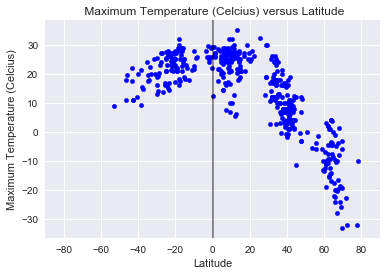

In [10]:
# Temperature vs Latitude 
random_cities.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")
plt.title(" Maximum Temperature (Celcius) versus Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Maximum Temperature vs Latitude")
plt.show()

# Maximum Temperature versus Latitude - Observations
This is the observation for this chart.


# Humidity versus Latitude

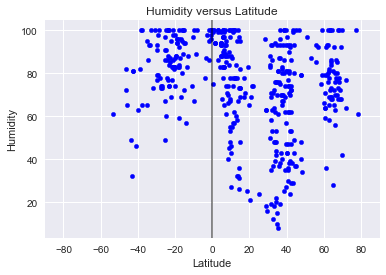

In [11]:

# Humidity vs Latitude 

random_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")
plt.title("Humidity versus Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Humidity vs Latitude")
plt.show()

# Humidity versus Latitude - Observations
This is the observation for this chart.


# Wind Speed versus Latitude

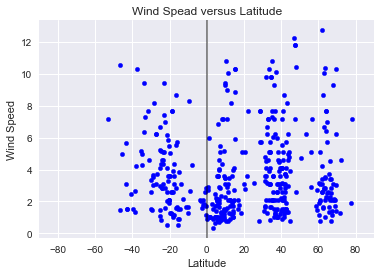

In [12]:
# Wind Speed vs Latitude
random_cities["Wind Speed"] = pd.to_numeric(random_cities["Wind Speed"])
random_cities.plot(kind="scatter",x="Latitude",y="Wind Speed",grid=True,color="blue")
plt.title("Wind Spead versus Latitude")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Wind speed vs Latitude")
plt.show()

# Wind Speed versus Latitude - Observations
This is the observation for this chart.


# Cloudiness versus Latitude

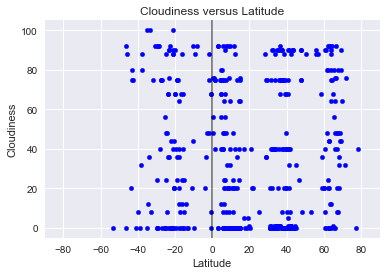

In [13]:
# Cloudiness vs Latitude
random_cities["Cloudiness"] = pd.to_numeric(random_cities["Cloudiness"])
random_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")
plt.title("Cloudiness versus Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-90,90])
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Cloudiness vs Latitude")
plt.show()

# Cloudiness versus Latitude - Observations
This is the observation for this chart.

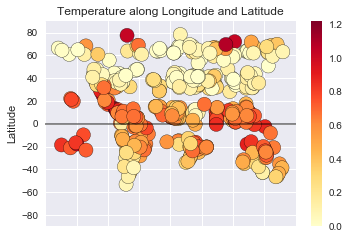

In [15]:
# Temperature approaching equator
size_temp = np.round((((random_cities.Temperature)/100)**2)*10,2)

random_cities.plot(kind="scatter",x="Longitude",y="Latitude",grid=True, edgecolor="black",
                     c=size_temp,s=200,cmap=plt.cm.YlOrRd)
plt.xlabel("Longitude")
plt.tight_layout()
plt.title("Temperature along Longitude and Latitude")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.ylim([-90,90])
plt.grid(True)

plt.xlim([-200,200])
plt.subplots_adjust(bottom=.25, left=.25)

plt.axhline(0, color='black',alpha=0.5)
plt.savefig("Temperature approaching Equator")

plt.show()